########################################################

#Copyright (c) DeepSphere.AI 2021

# All rights reserved

# We are sharing this partial code for learning and research, and the idea behind us sharing the source code is to stimulate ideas #and thoughts for the learners to develop their MLOps.

# Author: # DeepSphere.AI | deepsphere.ai | dsschoolofai.com | info@deepsphere.ai

# Release: Initial release

#######################################################

The data used for training the model is UTKFace data. 

Following commands can be used to access data:

!git clone https://github.com/Deepsphere-AI/IndustryUseCases/blob/master/DSAI_Oops_patient_segmentation/DSAI_Patient_Segmentation_data.zip
                      or
!wget https://github.com/Deepsphere-AI/IndustryUseCases/blob/master/DSAI_Oops_patient_segmentation/DSAI_Patient_Segmentation_data.zip

!unzip /content/IndustryUseCases/DSAI_Oops_patient_segmentation/DSAI_Patient_Segmentation_data.zip

In [ ]:
from google.colab import files
files.upload()

Saving DSAI_utk.zip to DSAI_utk.zip


In [ ]:
import zipfile
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import keras 
from keras.layers import *
from keras.models import *
from keras import backend as K
from sklearn.model_selection import train_test_split

zipfile package is used to unzip the .zip file 

In [ ]:
with zipfile.ZipFile('/content/DSAI_utk.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/git')

CLASS      : classification

USED METHODS    : 
              init(),
             data_normalization(),
             plot_age(),
             display_sample(),
             feature_selection(),
             trantest_split(),
             model(),
             model_compile(),
             train_model(),
             model_visualisation(),
             display(),
             get_ethncty(),
             get_genders(),
             test_model()



The model used here is a multi-target CNN sequencial Keras model. A single model outputs three different variables Age, Gender and Ethnicity respectively. The model layers, dense and dropout rates are explained below.

In [ ]:
class classification:
  def __init__(self,data_path):
    self.path = data_path
    self.files = os.listdir(path)
    self.images = []
    self.ages = []
    self.genders = []
    self.ethncty = []

  def data_normalization(self):
    for file in self.files:
      image = cv2.imread(path+'/'+file,0)
      image = cv2.resize(image,dsize=(64,64))
      image = image.reshape((image.shape[0],image.shape[1],1))
      # plt.imshow(image)
      split_var = file.split('_')
      # print(split_var[0],split_var[1],split_var[2])
      if '.jpg' not in split_var[2]:
          self.images.append(image)
          self.ages.append(split_var[0])
          self.genders.append(int(split_var[1]))
          self.ethncty.append(int(split_var[2]))

  def plot_age(self):
    x_ages = list(set(self.ages))
    y_ages = [self.ages.count(i) for i in x_ages]
    plt.bar(x_ages,y_ages)
    plt.show()
    print("Max value:",max(self.ages))

  def display_sample(self):
    idx = 50
    self.sample = self.images[idx]
    print("Gender:",self.genders[idx],"Age:",self.ages[idx],"Ethnicity:",self.ethncty[idx])
    plt.imshow(self.sample[:,:,0])
    plt.show()

  def feature_selection(self):
    size = len(self.ages)
    self.target = np.zeros((size,3),dtype='float32')
    self.features = np.zeros((size,self.sample.shape[0],self.sample.shape[1],1),dtype = 'float32')
    for i in range(size):
        self.target[i,0] = int(self.ages[i])
        self.target[i,1] = int(self.genders[i])
        self.target[i,2] = int(self.ethncty[i])
        self.features[i] = self.images[i]
    self.features = self.features / 255
    return self.features[550]

  def traintest_split(self):
    self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.features, self.target, test_size=0.2,shuffle  = True)
    print("Samples in Training:",self.x_train.shape[0])
    print("Samples in Testing:",self.x_test.shape[0])

  def model(self):
    inputs = Input(shape=(64,64,1))
    conv1 = Conv2D(32, kernel_size=(3, 3),activation='relu')(inputs)
    conv2 = Conv2D(64, kernel_size=(3, 3),activation='relu')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(128, kernel_size=(3, 3),activation='relu')(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)
    x = Dropout(0.25)(pool2)
    flat = Flatten()(x)

    dropout = Dropout(0.5)
    age_model = Dense(128, activation='relu')(flat)
    age_model = dropout(age_model)
    age_model = Dense(64, activation='relu')(age_model)
    age_model = dropout(age_model)
    age_model = Dense(32, activation='relu')(age_model)
    age_model = dropout(age_model)
    age_model = Dense(1, activation='relu')(age_model)

    dropout = Dropout(0.5)
    gender_model = Dense(128, activation='relu')(flat)
    gender_model = dropout(gender_model)
    gender_model = Dense(64, activation='relu')(gender_model)
    gender_model = dropout(gender_model)
    gender_model = Dense(32, activation='relu')(gender_model)
    gender_model = dropout(gender_model)
    gender_model = Dense(16, activation='relu')(gender_model)
    gender_model = dropout(gender_model)
    gender_model = Dense(8, activation='relu')(gender_model)
    gender_model = dropout(gender_model)
    gender_model = Dense(1, activation='sigmoid')(gender_model)

    dropout = Dropout(0.5)
    ethncty_model = Dense(128, activation='relu')(flat)
    ethncty_model = dropout(ethncty_model)
    ethncty_model = Dense(64, activation='relu')(ethncty_model)
    ethncty_model = dropout(ethncty_model)
    ethncty_model = Dense(32, activation='relu')(ethncty_model)
    ethncty_model = dropout(ethncty_model)
    ethncty_model = Dense(16, activation='relu')(ethncty_model)
    ethncty_model = dropout(ethncty_model)
    ethncty_model = Dense(8, activation='relu')(ethncty_model)
    ethncty_model = dropout(ethncty_model)
    ethncty_model = Dense(1, activation='relu')(ethncty_model)
    model = Model(inputs=inputs, outputs=[age_model,gender_model,ethncty_model])
    return model

  def model_compile(self,model):
    model.compile(optimizer = 'adam', loss =['mse','binary_crossentropy'],metrics=['accuracy'])
    model.summary()
    return model

  def train_model(self,model,epoch):
    self.h = model.fit(self.x_train,[self.y_train[:,0],self.y_train[:,1],self.y_train[:,2]],validation_data=(self.x_test,[self.y_test[:,0],self.y_test[:,1],self.y_test[:,2]]),epochs = int(epoch), batch_size=128,shuffle = True)
    model.save('data.h5')
    return model

  def model_visualisation(self):
    history = self.h
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
  
  def display(self,img):
    plt.imshow(img[:,:,0])
    plt.show()
    
  def get_ethncty(self,res):
      # 0 to 4, denoting White, Black, Asian, Indian, and Other
      if res == 0:
        return "White"
      elif res == 1:
        return "Black"
      elif res == 2:
        return "Asian"
      elif res == 3:
        return "Indian"
      else: return "Others"
      
  def get_genders(self,prob):
      if prob < 0.5:return "Male"
      else: return "Female"

  def get_result(self,sample,model):
      sample = sample/255
      val = model.predict( np.array([ sample ]) ) 
      return val   


Model-Layer description:

    inputs -> Input() 
    conv1  -> Conv2D()(inputs) 
    conv2  -> Conv2D()(conv1)
    pool1  -> MaxPooling2D()(conv2)
    conv3  -> Conv2D()(pool1)
    pool2  -> MaxPooling2D()(conv3)
The input layer is of size 32 with the kernel size [3,3] and relu as activation function. The base model is constructed with relu function and    futhur customised for each target. The dropout rate is kept at 0.5 for all three outputs. The output layer is defined with sigmoid activation 
function for age and ethnicity. The get functions retrive thier original format from the model array outputs.



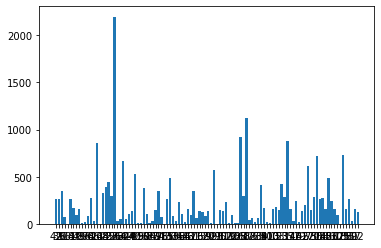

Max value: 99
Gender: 0 Age: 26 Ethnicity: 1


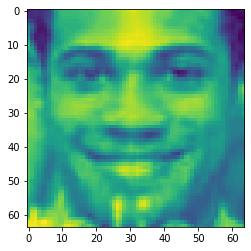

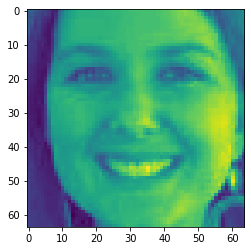

Samples in Training: 18964
Samples in Testing: 4741
Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 conv2d_27 (Conv2D)             (None, 62, 62, 32)   320         ['input_10[0][0]']               
                                                                                                  
 conv2d_28 (Conv2D)             (None, 60, 60, 64)   18496       ['conv2d_27[0][0]']              
                                                                                                  
 max_pooling2d_18 (MaxPooling2D  (None, 30, 30, 64)  0           ['conv2d_28[0][0]']              
 )                                      

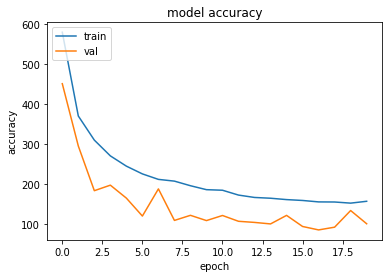

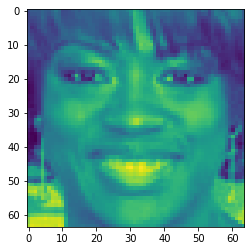

ACTUAL 

Gender: Female Age: 49 Ethnicity Black

PREDICTED

MODEL OUTCOME: [array([[31.074146]], dtype=float32), array([[0.47668985]], dtype=float32), array([[0.00015761]], dtype=float32)] 
Predicted Gender: Male 
Predicted Age: 31 
Predicted ethnicity Others


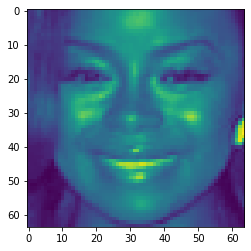

ACTUAL 

Gender: Female Age: 25 Ethnicity Black

PREDICTED

MODEL OUTCOME: [array([[28.453196]], dtype=float32), array([[0.47668985]], dtype=float32), array([[0.]], dtype=float32)] 
Predicted Gender: Male 
Predicted Age: 28 
Predicted ethnicity White


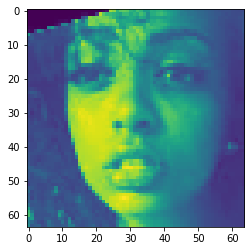

ACTUAL 

Gender: Female Age: 24 Ethnicity Black

PREDICTED

MODEL OUTCOME: [array([[23.88837]], dtype=float32), array([[0.47668985]], dtype=float32), array([[0.00089343]], dtype=float32)] 
Predicted Gender: Male 
Predicted Age: 24 
Predicted ethnicity Others


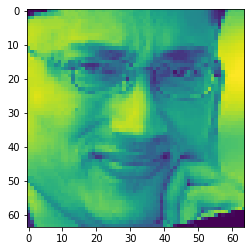

ACTUAL 

Gender: Male Age: 30 Ethnicity Asian

PREDICTED

MODEL OUTCOME: [array([[35.930626]], dtype=float32), array([[0.47668985]], dtype=float32), array([[0.00033247]], dtype=float32)] 
Predicted Gender: Male 
Predicted Age: 36 
Predicted ethnicity Others


In [ ]:
if __name__ == '__main__':
  path = '/content/git/utkcropped/utkcropped'
  obj = classification(path)
  obj.data_normalization()
  obj.plot_age()
  obj.display_sample()
  vAR_pic = obj.feature_selection()
  obj.display(vAR_pic)
  obj.traintest_split()
  vAR_model = obj.model()
  vAR_compiled_model = obj.model_compile(vAR_model)
  epochs = input("Enter epochs")
  vAR_trained_model = obj.train_model(vAR_compiled_model,epochs)
  obj.model_visualisation()

  indexes = [500,59,80,2,4741,1278,2587,789,3891,230]
  op_lst = []
  for idx in indexes:
      dict = {}
      sample = obj.images[idx]
      obj.display(sample)
      print("ACTUAL \n")
      print("Gender:",obj.get_genders(obj.genders[idx]),"Age:",obj.ages[idx],"Ethnicity",obj.get_ethncty(obj.ethncty[idx]))
      res = obj.get_result(sample,vAR_trained_model)
      age = res[0]
      age = age[0]
      age = round(age[0])
      print("\nPREDICTED")
      print("\nMODEL OUTCOME:",res,"\nPredicted Gender:",obj.get_genders(res[1]),"\nPredicted Age:",age,"\nPredicted ethnicity",obj.get_ethncty(res[2]))
      dict = {'Image': obj.images[idx],
              'Age':age,
              'Gender':obj.get_genders(res[1]),
              'Ethnicity':obj.get_ethncty(res[2])}
      op_lst.append(dict)
  op_df = pd.DataFrame(op_lst)
  op_df.to_csv('Model_output.csv')